In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Casual Modeling

As we can see, there is a correlation between promotions and flows, and it depends on the lag. But this does not mean that there is a cause-and-effect relationship.
We will look for it by training the structure of a Gaussian Baysian dynamic network. The corresponding library is implemented only for R https://github.com/dkesada/dbnR.

The best implemented method is natPsoho.

In fact, this network is a set of linear regression equations that represent cause-and-effect relationships.


In [ ]:
# Download output from R
dbnR = pd.read_csv('dbnR_out.csv')
dbnR.drop(['Unnamed: 0'], axis = 1, inplace = True)
dbnR.shape

(20, 43)

In [ ]:
dbnR.sd.mean()  # Standard deviation of regression errors

2.154517709663787

In [ ]:
# As a result, the following dependencies were found.
# name - name of the dependent variable, sd - standard deviation of the error,
# regression coefficient in the corresponding column

dbnR.head()

,(Intercept),sleeping_to_loyal_t_1,sleeping_to_churn_t_1,loyal_to_sleeping_t_1,loyal_to_champions_t_1,champions_to_champions_t_1,champions_to_churn_t_1,churn_to_sleeping_t_1,count_promo_Billboards_t_1,count_promo_Facades_t_1,...,champions_to_sleeping_t_2,champions_to_loyal_t_2,churn_to_sleeping_t_2,churn_to_loyal_t_2,count_promo_Facades_t_2,count_promo_Biweekly_t_2,sleeping_to_champions_t_1,loyal_to_loyal_t_1,sleeping_to_churn_t_2,loyal_to_loyal_t_2
0,0.081580,-0.753233,-0.745497,0.047938,-0.166275,-0.086286,0.019692,-0.456483,-0.001506,-0.017539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014202,NaN,NaN,NaN,NaN,-0.024966,0.115857,-3.274925,-0.009657,-0.003687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.034795,-0.134291,NaN,-0.117266,0.109861,-0.153718,NaN,-0.643898,-0.008214,0.020368,...,0.109623,0.124501,-0.770556,-2.522781,-0.010154,-0.001317,NaN,NaN,NaN,NaN
3,0.004981,1.374857,NaN,NaN,NaN,NaN,NaN,NaN,-0.009965,NaN,...,NaN,0.078711,1.381113,-1.302608,NaN,-0.029065,1.464199,NaN,NaN,NaN
4,0.000099,0.862614,NaN,-0.498396,NaN,0.480204,NaN,NaN,NaN,-0.032741,...,NaN,NaN,NaN,1.853149,NaN,NaN,4.127557,-0.377934,0.124336,NaN


In [ ]:
# Streams affected by promotions:
expr = (~dbnR.count_promo_Billboards_t_1.isna()) | (~dbnR.count_promo_Billboards_t_2.isna()) | \
       (~dbnR.count_promo_Facades_t_1.isna()) | (~dbnR.count_promo_Facades_t_2.isna()) | \
       (~dbnR.count_promo_Seasonal_t_1.isna()) | (~dbnR.count_promo_Seasonal_t_2.isna()) | \
       (~dbnR.count_promo_Biweekly_t_1.isna()) | (~dbnR.count_promo_Biweekly_t_2.isna())

dbnR[expr]

,(Intercept),sleeping_to_loyal_t_1,sleeping_to_churn_t_1,loyal_to_sleeping_t_1,loyal_to_champions_t_1,champions_to_champions_t_1,champions_to_churn_t_1,churn_to_sleeping_t_1,count_promo_Billboards_t_1,count_promo_Facades_t_1,...,champions_to_sleeping_t_2,champions_to_loyal_t_2,churn_to_sleeping_t_2,churn_to_loyal_t_2,count_promo_Facades_t_2,count_promo_Biweekly_t_2,sleeping_to_champions_t_1,loyal_to_loyal_t_1,sleeping_to_churn_t_2,loyal_to_loyal_t_2
0,0.081580,-0.753233,-0.745497,0.047938,-0.166275,-0.086286,0.019692,-0.456483,-0.001506,-0.017539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014202,NaN,NaN,NaN,NaN,-0.024966,0.115857,-3.274925,-0.009657,-0.003687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.034795,-0.134291,NaN,-0.117266,0.109861,-0.153718,NaN,-0.643898,-0.008214,0.020368,...,0.109623,0.124501,-0.770556,-2.522781,-0.010154,-0.001317,NaN,NaN,NaN,NaN
3,0.004981,1.374857,NaN,NaN,NaN,NaN,NaN,NaN,-0.009965,NaN,...,NaN,0.078711,1.381113,-1.302608,NaN,-0.029065,1.464199,NaN,NaN,NaN
4,0.000099,0.862614,NaN,-0.498396,NaN,0.480204,NaN,NaN,NaN,-0.032741,...,NaN,NaN,NaN,1.853149,NaN,NaN,4.127557,-0.377934,0.124336,NaN
5,-0.034863,NaN,NaN,1.087910,-3.406297,NaN,1.005390,12.964141,NaN,0.156400,...,0.612236,-0.500910,NaN,NaN,-0.091994,0.004118,NaN,NaN,-1.497212,1.788514
6,0.030067,-3.392884,NaN,NaN,1.422889,NaN,NaN,-16.023254,-0.002965,-0.021170,...,NaN,NaN,22.933035,NaN,-0.007530,NaN,NaN,NaN,NaN,0.992999
7,0.149179,NaN,NaN,-0.468234,NaN,NaN,0.528761,NaN,NaN,-0.013686,...,NaN,0.054322,NaN,-8.222300,NaN,0.011200,0.965966,-0.301932,NaN,NaN
8,0.041057,-4.113693,-2.052571,NaN,NaN,-0.260235,-0.277250,0.770920,NaN,NaN,...,NaN,NaN,-1.397905,-0.803366,NaN,0.008163,NaN,NaN,-1.571381,NaN
9,-0.226732,-4.689371,NaN,-5.283714,NaN,-0.403413,-1.078251,-3.104248,-0.224763,-0.104971,...,NaN,-0.548161,6.434320,-27.670329,-0.013513,NaN,NaN,-2.661927,NaN,NaN


In [ ]:
collist=['name', 'sd', 'count_promo_Billboards_t_1', 'count_promo_Billboards_t_2',
         'count_promo_Facades_t_1', 'count_promo_Facades_t_2', 'count_promo_Biweekly_t_1',
         'count_promo_Biweekly_t_2', 'count_promo_Seasonal_t_1', 'count_promo_Seasonal_t_2']

good_flows = ['churn_to_sleeping_t_0', 'churn_to_loyal_t_0','churn_to_champions_t_0',
              'sleeping_to_loyal_t_0', 'sleeping_to_champions_t_0', 'loyal_to_champions_t_0']

bad_flows = ['champions_to_churn_t_0','champions_to_sleeping_t_0', 'champions_to_loyal_t_0',
             'loyal_to_churn_t_0', 'loyal_to_sleeping_t_0', 'sleeping_to_churn_t_0']

neutral_flows = ['champions_to_champions_t_0', 'loyal_to_loyal_t_0', 'sleeping_to_sleeping_t_0', 'churn_to_churn_t_0']

# Useful flows. You can see which promotions affect them positively and negatively
dbnR[dbnR.name.isin(good_flows)][collist]

,name,sd,count_promo_Billboards_t_1,count_promo_Billboards_t_2,count_promo_Facades_t_1,count_promo_Facades_t_2,count_promo_Biweekly_t_1,count_promo_Biweekly_t_2,count_promo_Seasonal_t_1,count_promo_Seasonal_t_2
1,sleeping_to_loyal_t_0,0.110443,-0.009657,0.000080,-0.003687,NaN,NaN,NaN,NaN,NaN
2,sleeping_to_champions_t_0,0.062005,-0.008214,NaN,0.020368,-0.010154,0.011204,-0.001317,NaN,NaN
6,loyal_to_champions_t_0,0.759129,-0.002965,NaN,-0.021170,-0.007530,NaN,NaN,-0.005646,NaN
12,churn_to_sleeping_t_0,0.110980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001714
13,churn_to_loyal_t_0,0.071206,0.004246,-0.003802,0.001111,NaN,NaN,-0.000111,0.000035,NaN
14,churn_to_champions_t_0,0.065164,-0.005313,NaN,NaN,-0.007771,0.002340,NaN,-0.001012,NaN


In [ ]:
# Harmful flows.
dbnR[dbnR.name.isin(bad_flows)][collist]

,name,sd,count_promo_Billboards_t_1,count_promo_Billboards_t_2,count_promo_Facades_t_1,count_promo_Facades_t_2,count_promo_Biweekly_t_1,count_promo_Biweekly_t_2,count_promo_Seasonal_t_1,count_promo_Seasonal_t_2
3,sleeping_to_churn_t_0,0.232718,-0.009965,0.034074,NaN,NaN,0.028631,-0.029065,NaN,0.003142
4,loyal_to_sleeping_t_0,0.419519,NaN,0.000125,-0.032741,NaN,NaN,NaN,NaN,NaN
7,loyal_to_churn_t_0,0.503407,NaN,-0.014359,-0.013686,NaN,NaN,0.011200,NaN,-0.004154
8,champions_to_sleeping_t_0,0.450667,NaN,NaN,NaN,NaN,NaN,0.008163,0.001722,-0.002158
9,champions_to_loyal_t_0,1.529116,-0.224763,0.149380,-0.104971,-0.013513,NaN,NaN,0.002994,NaN
11,champions_to_churn_t_0,0.608257,NaN,0.026947,NaN,NaN,NaN,NaN,NaN,0.002587


In [ ]:
# Neutral flows.
dbnR[dbnR.name.isin(neutral_flows)][collist]

,name,sd,count_promo_Billboards_t_1,count_promo_Billboards_t_2,count_promo_Facades_t_1,count_promo_Facades_t_2,count_promo_Biweekly_t_1,count_promo_Biweekly_t_2,count_promo_Seasonal_t_1,count_promo_Seasonal_t_2
0,sleeping_to_sleeping_t_0,0.235631,-0.001506,NaN,-0.017539,NaN,-0.013915,NaN,-0.000364,0.000171
5,loyal_to_loyal_t_0,0.875698,NaN,NaN,0.156400,-0.091994,NaN,0.004118,NaN,NaN
10,champions_to_champions_t_0,1.119487,NaN,0.141965,NaN,0.049756,NaN,-0.004603,-0.006743,NaN
15,churn_to_churn_t_0,0.145090,NaN,NaN,0.025243,NaN,-0.006020,NaN,0.004302,-0.001324


In [ ]:
# In conclusion, let’s compare real flows and their models

from sklearn.metrics import r2_score, mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def find_series(series_name):
    sname = series_name[:-4]
    lag = int(series_name[-1])
    return df_diff[sname].shift(periods = lag).values

def plot_models(flow_list):
    cols = list(dbnR.columns[1:])
    cols.remove('name')
    cols.remove('sd')
    n = len(flow_list)

    fig, ax  = plt.subplots(nrows = 1, ncols = n, figsize = (4 * n,3))

    for i,cname in enumerate(flow_list):
        cflow = dbnR[dbnR.name == cname]
        ts = np.zeros(df_diff.shape[0])
        for c in cols:
            if ~cflow[c].isna().values[0]:
                ts = ts + cflow[c].values[0] * find_series(c)

        ts = ts + cflow['(Intercept)'].values[0]

        ax[i].plot(ts, 'o-', label = 'prediction')
        ax[i].plot(df_diff[cname[:-4]], label = cname[:-4])
        ax[i].legend()
        ax[i].set_title('$R^2 =$' + str(round(r2_score(df_diff[cname[:-4]][2:], ts[2:]),3)) +
                      '  $RMSE =$' + str(round(rmse(df_diff[cname[:-4]][2:], ts[2:]),3)))


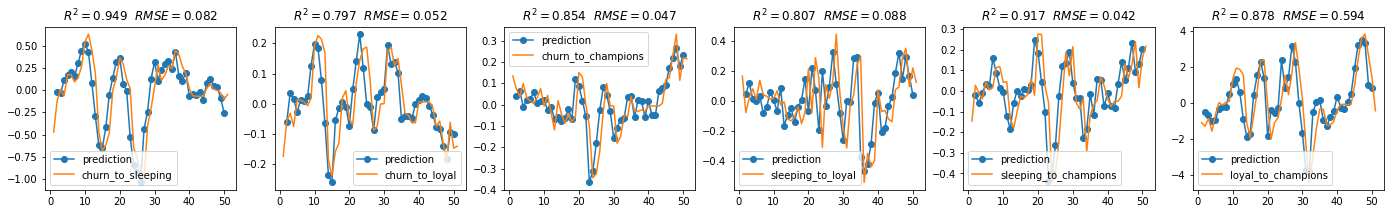

In [ ]:
plot_models(good_flows)

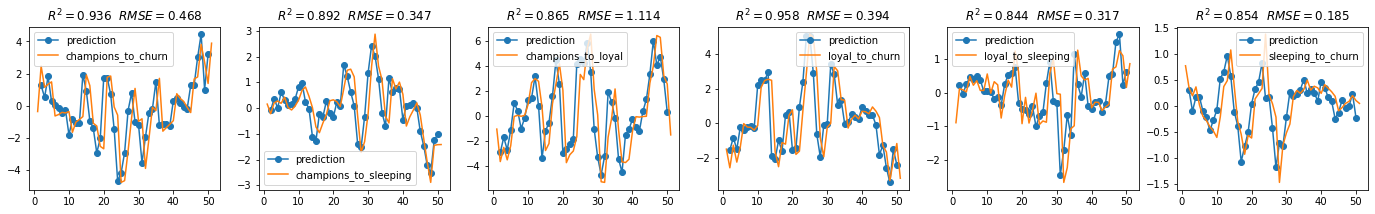

In [ ]:
plot_models(bad_flows)

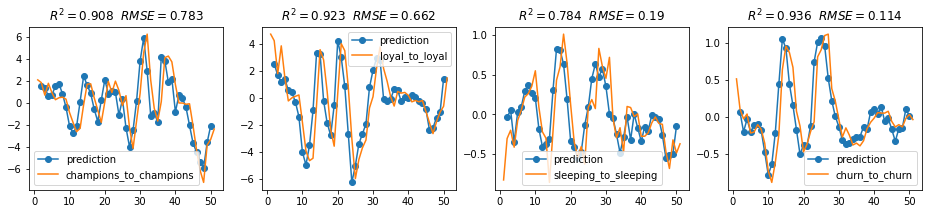

In [ ]:
plot_models(neutral_flows)